In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
class FourierTransform:
    def __init__(self, filename, ft_type='FFT'):
        self.filename = filename
        self.ft_type = ft_type
        self.data = self.load_data()
        self.label = filename.split('/')[-1].split('.')[0]
        self.record_sizes = [None, 256, 2048, 16384]  # None means whole set
        
    def load_data(self):
        # Skip the first 22 header lines
        data = np.loadtxt(self.filename, skiprows=22)
    
        # First column: sample number (convert to int), second column: velocity (float)
        sample_numbers = data[:, 0].astype(int)
        velocities = data[:, 1].astype(float)
        return velocities
    
    def set_ft_type(self, ft_type):
        self.ft_type = ft_type

    def dft(self, x):
        # Compute the Discrete Fourier Transform (DFT)
        N = len(x)
        n = np.arange(N)
        A = np.arange(N, dtype=complex)
        for k in range(N):
            X = np.array(x, dtype=complex)
            E = np.arange(N, dtype=complex)
            E = E.reshape((N,1))
            E = np.exp(-2j * np.pi * k * n / N)
            A[k] = np.dot(X, E)
        return A

    def compute_ft(self, data=None):
        if data is None:
            data = self.data
        if self.ft_type == 'FFT':
            return np.fft.fft(data)
        elif self.ft_type == 'DFT':
            return self.dft(data)

    def ft_routine(self, data, record_size=None):
        data_array = np.asarray(data)
        n = len(data_array) if record_size is None else record_size
        sampling_rate = 15000  # samples per second
        
        if record_size is None or record_size >= len(data_array):
            # Compute FFT for the whole set
            ft_result = self.compute_ft()
            ft_magnitude = np.abs(ft_result)[:n//2]
            ft_freq = np.fft.fftfreq(n)[:n//2] * sampling_rate
            return ft_freq, ft_magnitude
        
        # Windowed FFT
        num_windows = len(data_array) // record_size
        ft_results = []
        for i in range(num_windows):
            #print(f"Processing window {i+1}/{num_windows}")
            start = i * record_size
            end = start + record_size
            window_data = data_array[start:end]
            ft_result = self.compute_ft(window_data)
            ft_magnitude = np.abs(ft_result)[:record_size//2]
            ft_results.append(ft_magnitude)
        
        ft_freq = np.fft.fftfreq(record_size)[:record_size//2] * sampling_rate
        return ft_freq, ft_results

    def plot_ft(self):
        velocities = self.data
        plt.figure(figsize=(12, 6))
        ft_types = ['FFT', 'DFT']

        # Plot each record size and FT type combination
        for rec_size in self.record_sizes:
            for ft_type in ft_types:
                self.set_ft_type(ft_type)
                start = time.time()
                freq, mag = self.ft_routine(velocities, record_size=rec_size)
                print(f"FT Type: {self.ft_type}, Record Size: {rec_size}, Time taken: {time.time() - start:.4f} seconds\n")
                
                # Plot results
                if ft_type == 'DFT':
                    linestyle = '--'
                else:
                    linestyle = '-'
                if rec_size is None:
                    plt.plot(freq[1:], mag[1:], label=f'Whole set, {ft_type}', linestyle=linestyle)
                else:
                    # Compute average magnitude across windows
                    ave_mag = np.mean(mag, axis=0)
                    plt.plot(freq[1:], ave_mag[1:], label=f'Record Size: {rec_size}, {ft_type}', linestyle=linestyle)

        # Adjust plot settings
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.title(f'Average FT Magnitude vs Frequency for Different Record Sizes for {self.label}')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()

FT Type: FFT, Record Size: None, Time taken: 0.0037 seconds

FT Type: DFT, Record Size: None, Time taken: 199.3025 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0034 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7043 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0015 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4756 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0016 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.7980 seconds



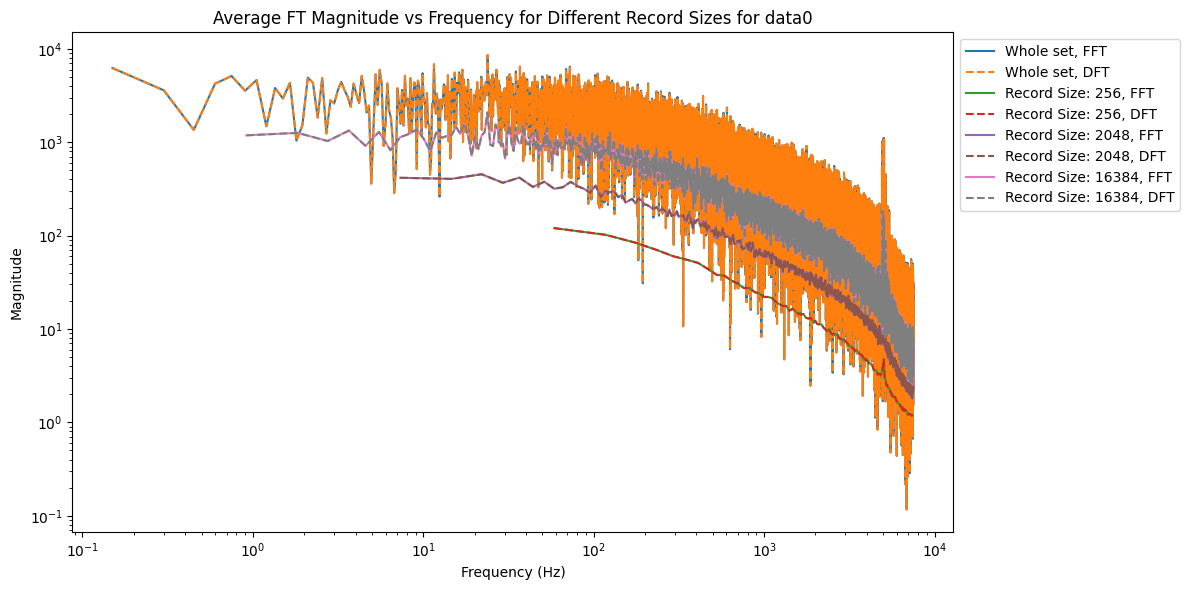

In [16]:
data0 = FourierTransform('f15000/data0.lvm')
data0.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0024 seconds

FT Type: DFT, Record Size: None, Time taken: 177.3288 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0028 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7027 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0013 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4837 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0013 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.8149 seconds



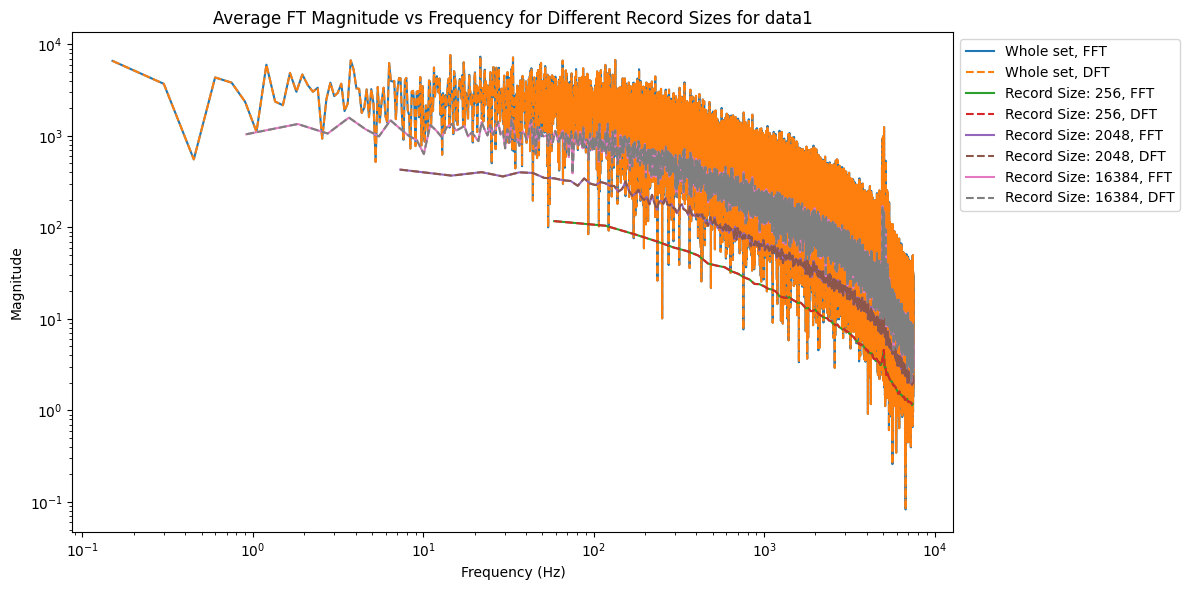

In [17]:
data1 = FourierTransform('f15000/data1.lvm')
data1.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0017 seconds

FT Type: DFT, Record Size: None, Time taken: 170.5035 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0032 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.6996 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0013 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4376 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0013 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.5928 seconds



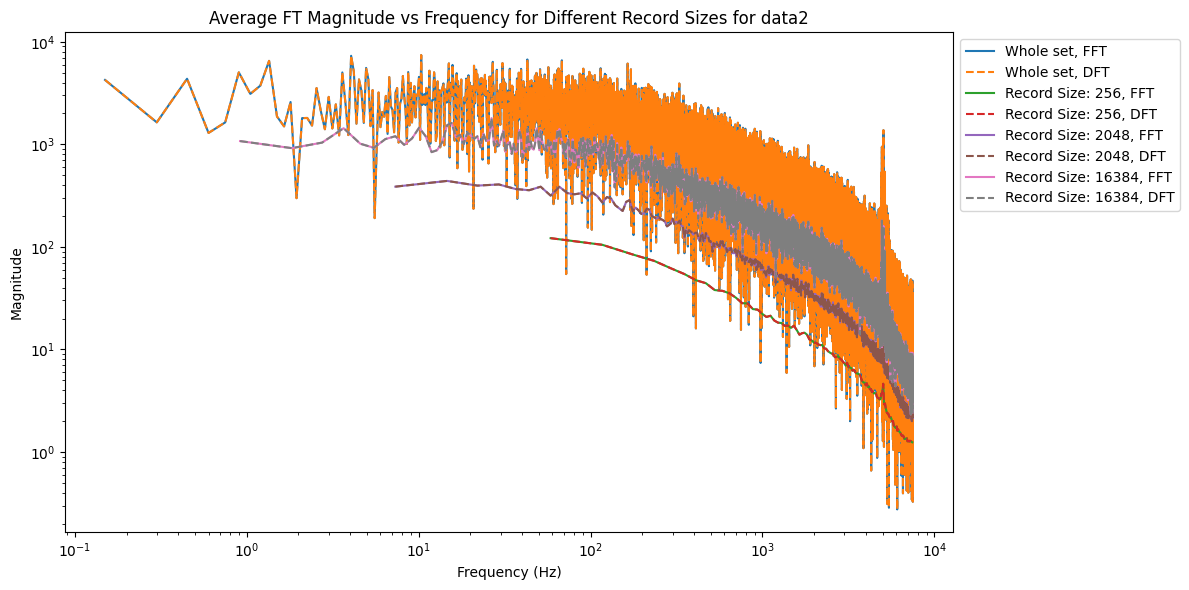

In [18]:
data2 = FourierTransform('f15000/data2.lvm')
data2.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0030 seconds

FT Type: DFT, Record Size: None, Time taken: 172.3459 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0028 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7032 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0013 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4660 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.7274 seconds



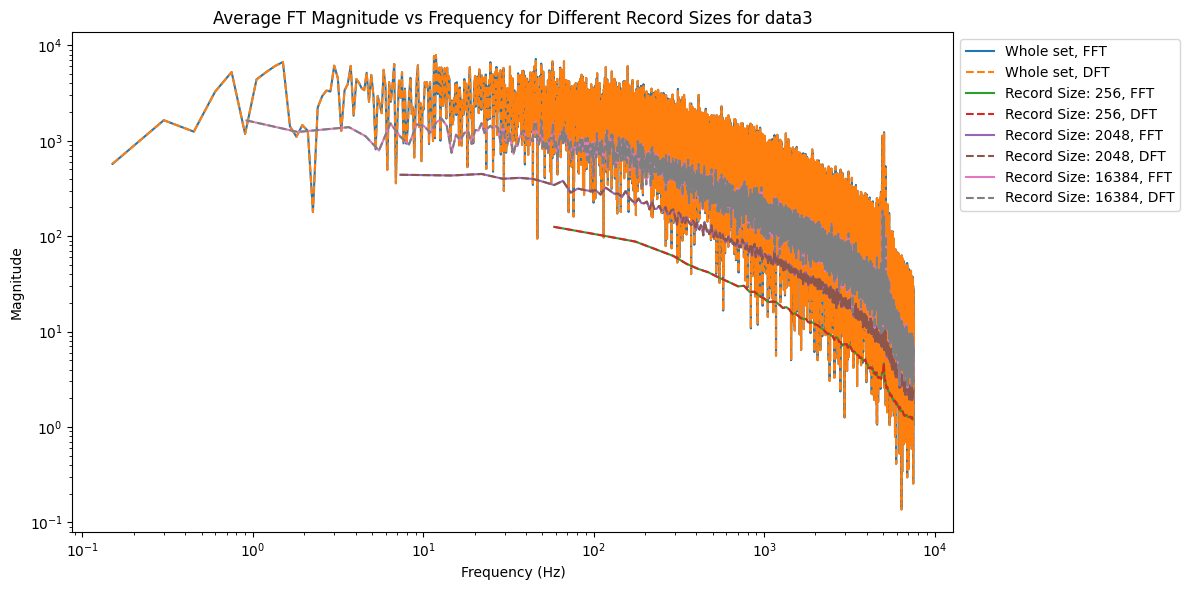

In [19]:
data3 = FourierTransform('f15000/data3.lvm')
data3.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0016 seconds

FT Type: DFT, Record Size: None, Time taken: 167.2542 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0033 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.6993 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4353 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0016 seconds

FT Type: DFT, Record Size: 16384, Time taken: 26.0365 seconds



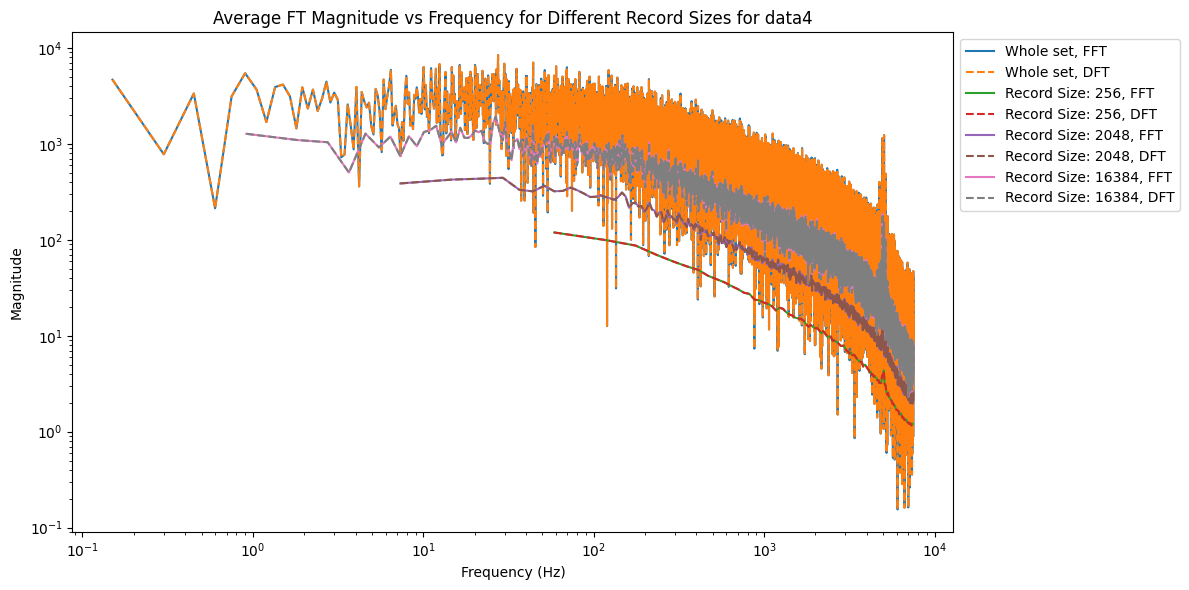

In [20]:
data4 = FourierTransform('f15000/data4.lvm')
data4.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0021 seconds

FT Type: DFT, Record Size: None, Time taken: 177.1758 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0028 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7039 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4906 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0012 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.7165 seconds



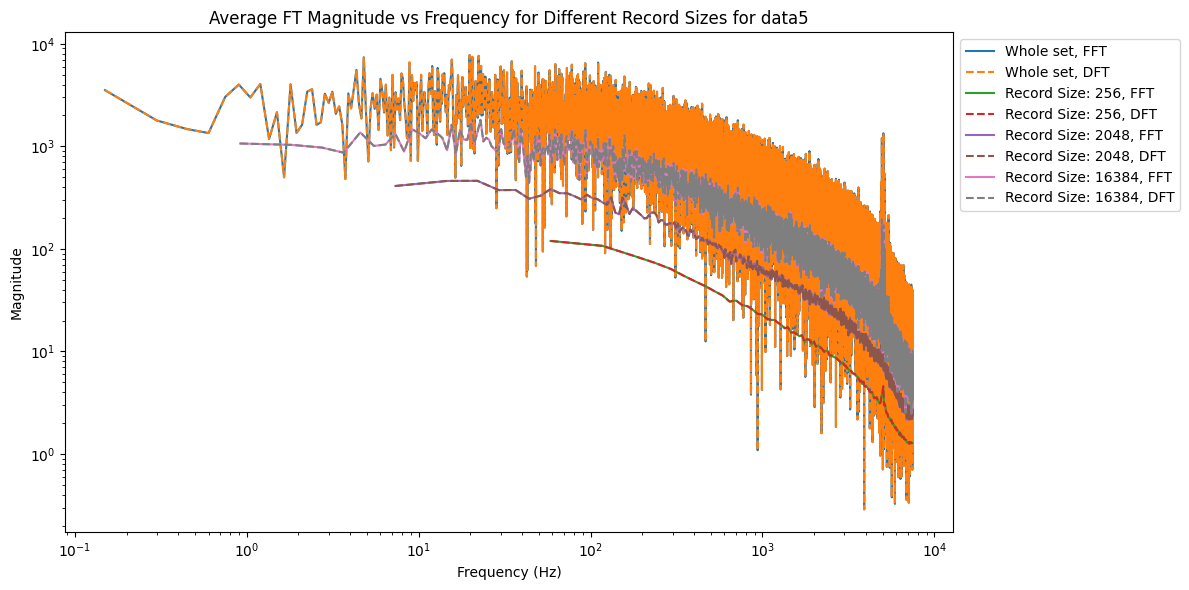

In [21]:
data5 = FourierTransform('f15000/data5.lvm')
data5.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0053 seconds

FT Type: DFT, Record Size: None, Time taken: 168.1728 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0038 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7002 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4382 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0015 seconds

FT Type: DFT, Record Size: 16384, Time taken: 26.2333 seconds



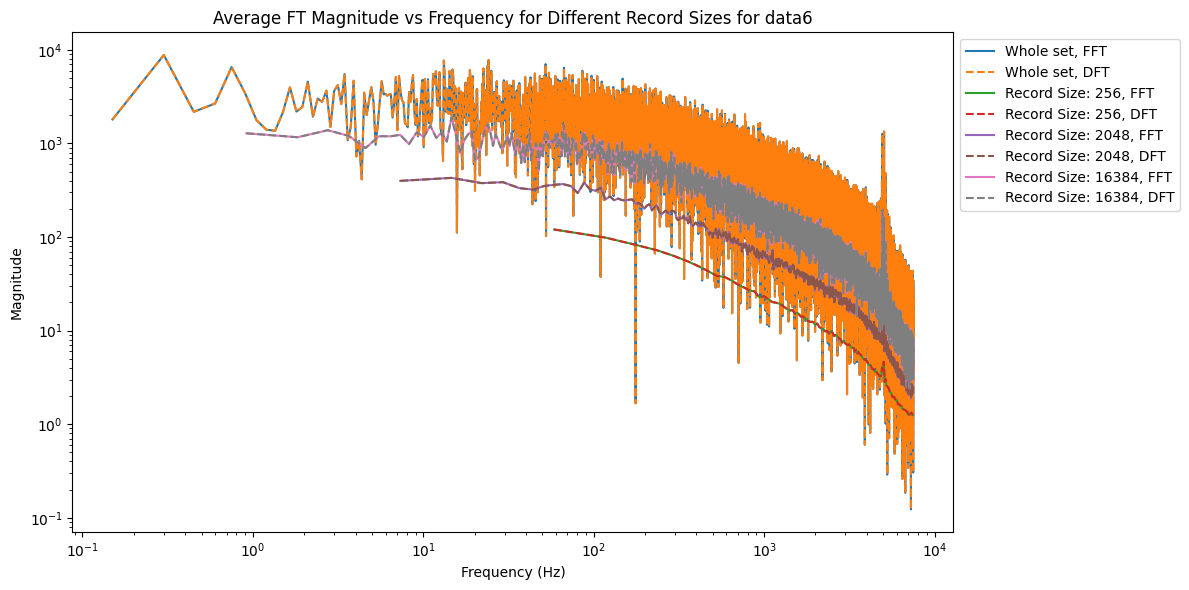

In [22]:
data6 = FourierTransform('f15000/data6.lvm')
data6.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0020 seconds

FT Type: DFT, Record Size: None, Time taken: 176.6195 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0030 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7029 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4374 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0014 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.4252 seconds



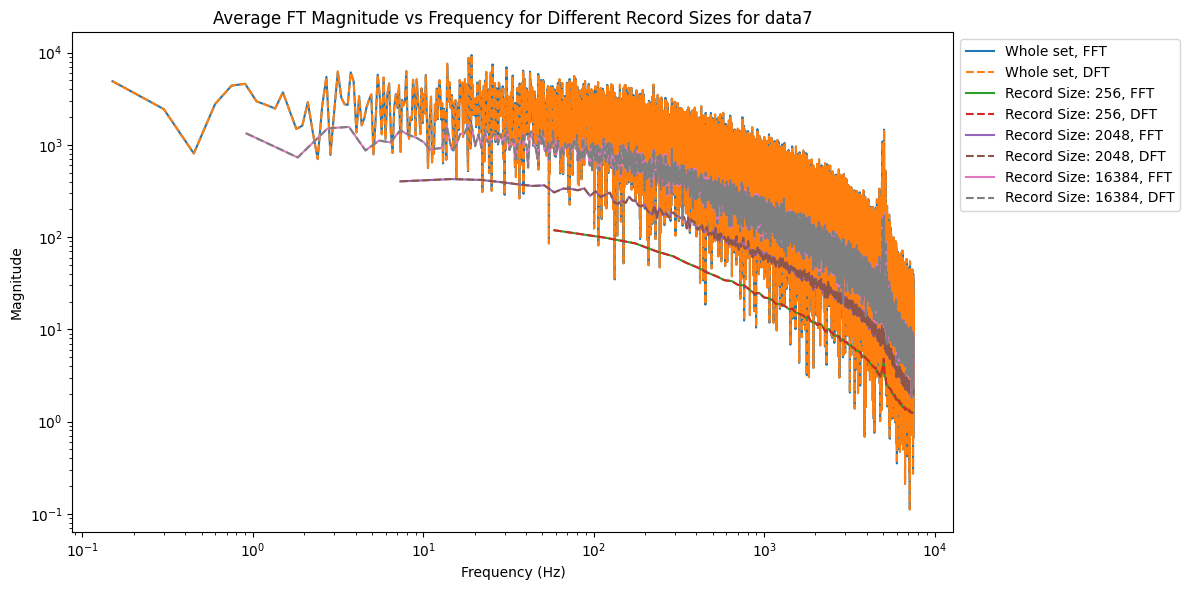

In [23]:
data7 = FourierTransform('f15000/data7.lvm')
data7.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0019 seconds



KeyboardInterrupt: 

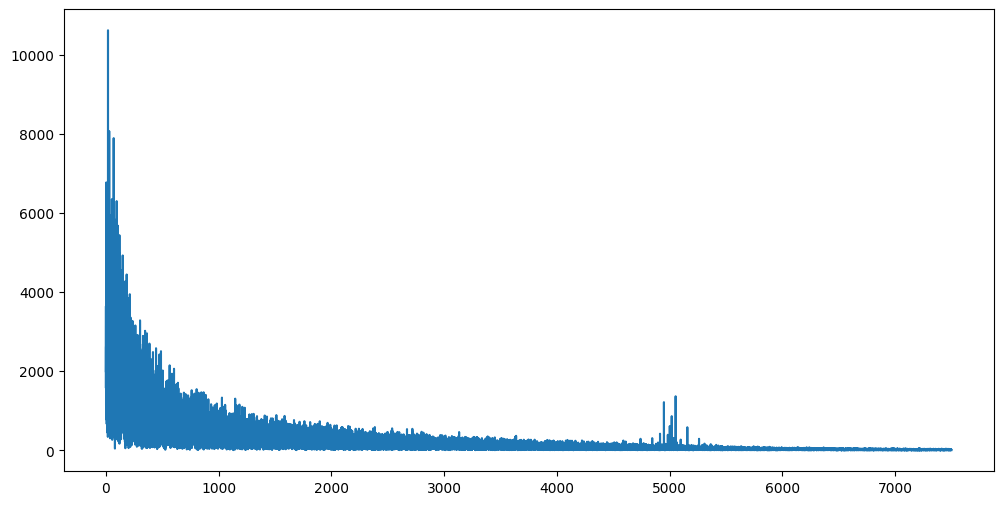

In [24]:
data8 = FourierTransform('f15000/data8.lvm')
data8.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0060 seconds

FT Type: DFT, Record Size: None, Time taken: 193.2624 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0031 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.7004 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0019 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4321 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0019 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.5909 seconds



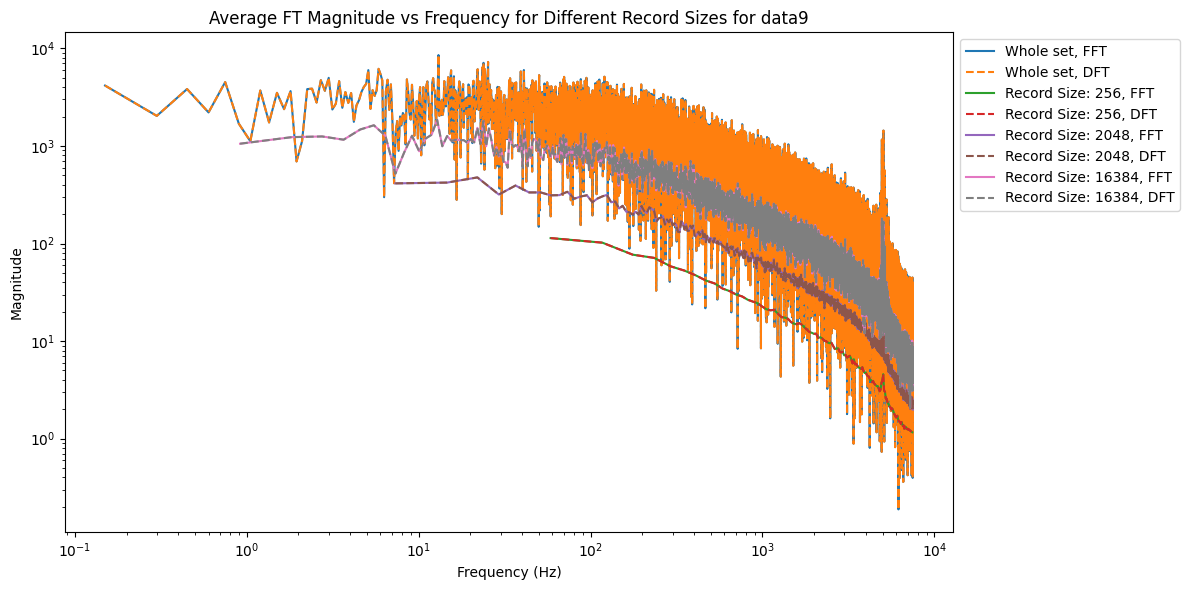

In [ ]:
data9 = FourierTransform('f15000/data9.lvm')
data9.plot_ft()

FT Type: FFT, Record Size: None, Time taken: 0.0060 seconds

FT Type: DFT, Record Size: None, Time taken: 169.6148 seconds

FT Type: FFT, Record Size: 256, Time taken: 0.0032 seconds

FT Type: DFT, Record Size: 256, Time taken: 0.6999 seconds

FT Type: FFT, Record Size: 2048, Time taken: 0.0016 seconds

FT Type: DFT, Record Size: 2048, Time taken: 3.4613 seconds

FT Type: FFT, Record Size: 16384, Time taken: 0.0015 seconds

FT Type: DFT, Record Size: 16384, Time taken: 25.6792 seconds



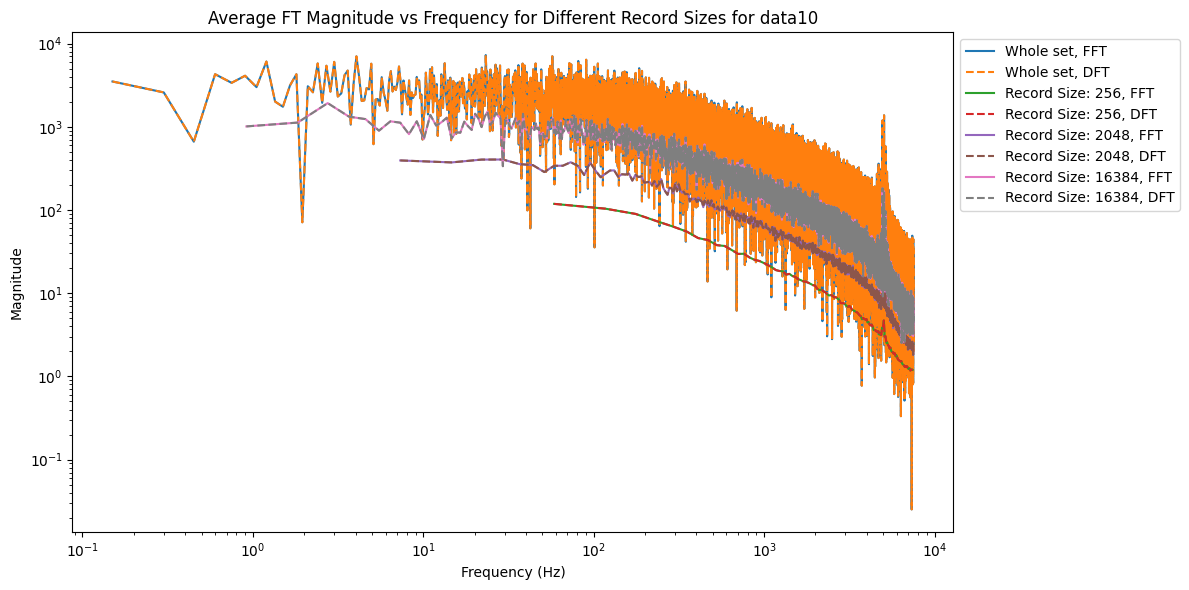

In [ ]:
data10 = FourierTransform('f15000/data10.lvm')
data10.plot_ft()

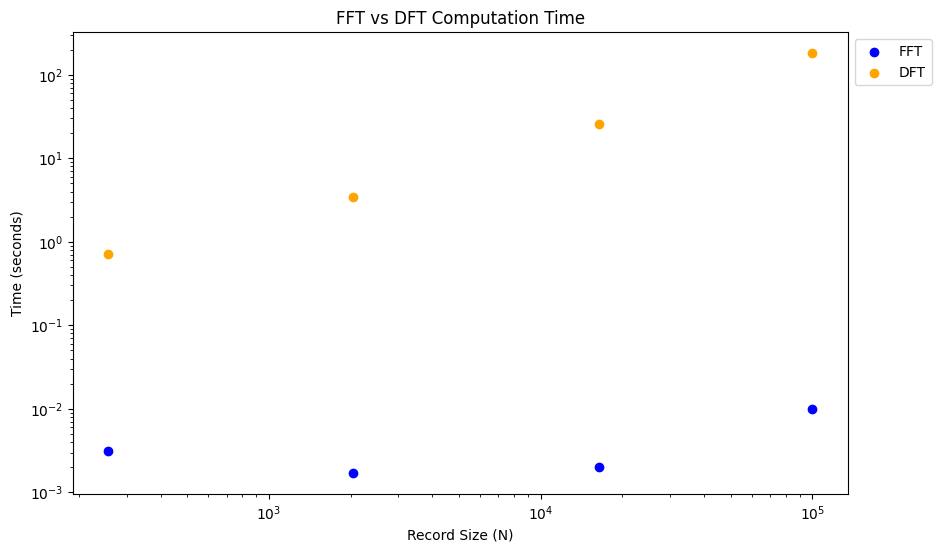

In [25]:
import matplotlib.pyplot as plt
record_sizes = [256, 2048, 16384, 100000]
fft_runtimes = [0.0031, 0.0017, 0.0020, 0.0099]
dft_runtimes = [0.7083, 3.4618, 25.7963, 181.6794]
plt.figure(figsize=(10, 6))
plt.scatter(record_sizes, fft_runtimes, label='FFT', color='blue')
plt.scatter(record_sizes, dft_runtimes, label='DFT', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Record Size (N)')
plt.ylabel('Time (seconds)')
plt.title('FFT vs DFT Computation Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()